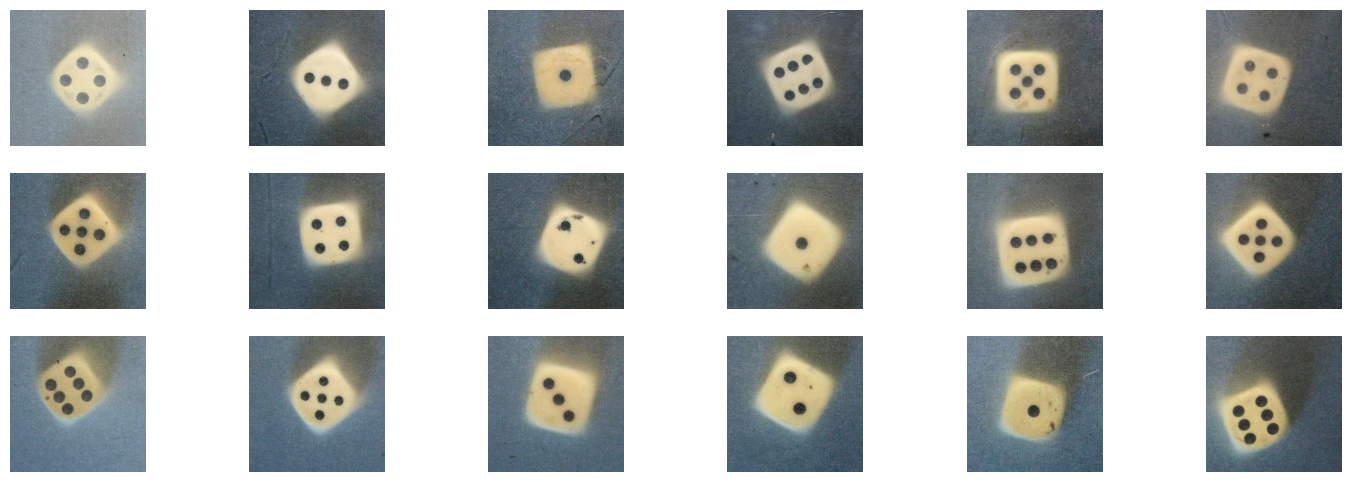

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Specify the path to the image file
# image_path = 'data/IMG_0179-3000px.jpg'
# image_path = 'data/IMG_0180-3000px.jpg'
# image_path = 'data/IMG_0181-3000px.jpg'
image_path = 'data/IMG_0185-3000px.jpg'
# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# normalize the image
# image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

def extract_dices_from_example_image(img, rows=3, cols = 6):

    # Calculate the height and width of each dice
    height = image.shape[0] // rows
    width = image.shape[1] // cols

    # Initialize a list to store the extracted dice images
    dice_images = []

    # Iterate over each dice in the matrix
    for r in range(rows):
        for c in range(cols):
            # Calculate the coordinates of the current dice
            x = c * width
            y = r * height

            # Extract the current dice from the image
            dice = image[y:y+height, x:x+width]

            # remove 15 pixels from each side
            dice = dice[15:-15, 15:-15]

            dice = cv2.normalize(dice, None, 0, 255, cv2.NORM_MINMAX)



            # Append the dice image to the list
            dice_images.append(dice)

    return dice_images


# image is 6x3 grid of dices with one face up each

rows = 3
cols = 6
dice_images = extract_dices_from_example_image(image, rows, cols)

# Display the extracted dice images in a grid
plt.figure(figsize=(rows * cols, cols))
for i, dice in enumerate(dice_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(dice)
    plt.axis('off')

In [ ]:
# save dice_images into separate jpgs
for i, dice in enumerate(dice_images):
    cv2.imwrite(f"data/dice_{i}_eyes_{dice_eyes[i]}.jpg", cv2.cvtColor(dice, cv2.COLOR_RGB2BGR))

In [25]:
no_dice_image = cv2.imread('data/dice_18_eyes_None.jpg')


In [32]:
# reload getDiceEyes.py
import getDiceEyes as gde
from importlib import reload
reload(gde)

<module 'getDiceEyes' from '/Users/tboverma/vol/projects/dice-recognition/getDiceEyes.py'>

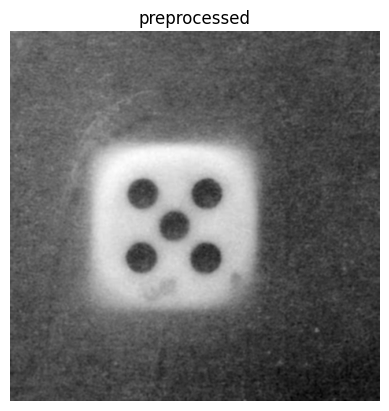

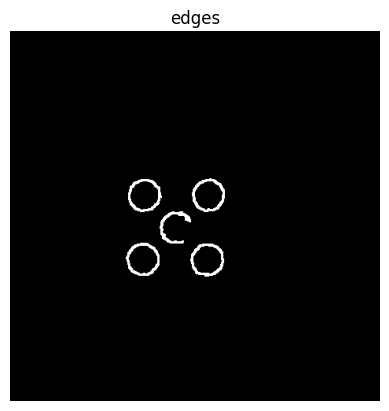

min: 1253.5,
max: 1418.5
number of contours: 5


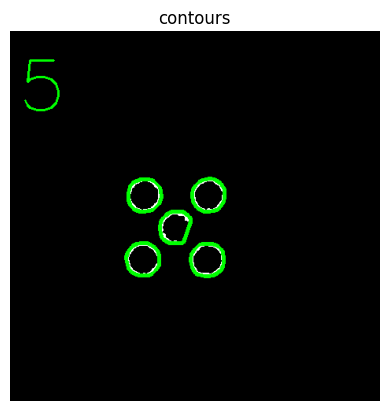

In [35]:
# test for one image

# img = no_dice_image.copy()
img = dice_images[4].copy()

preprocessed_image = gde.prepare_image(img, blur=5, normalise=False, verbose=True);
edges = gde.get_edges(preprocessed_image, canny_low=90, canny_high=200, dilate_erode_kernel_size=2, dilate_iterations=3, erode_iterations=1, verbose=True);
contours = gde.get_contours(edges, min_area=1000, max_area=20000, verbose=True);

In [45]:
def process_display_all(images, rows=3, cols=6, blur=5, normalise=False, canny_low=90, canny_high=200, dilate_erode_kernel_size=2, dilate_iterations=3, erode_iterations=1, min_area = 0.36 *  img_size, max_area = 0.9):

    img_size = len(images[0])**2

    min_area = (min_area / 100) * img_size
    max_area = (max_area / 100) * img_size

    all_imgs = []
    all_preprocessed = []
    all_edges = []
    all_contours = []
    for i, dice in enumerate(images):
        img = dice.copy()
        preprocessed_image = gde.prepare_image(img, blur=blur, normalise=normalise, verbose=False);
        edges = gde.get_edges(preprocessed_image, canny_low=canny_low, canny_high=canny_high, dilate_erode_kernel_size=dilate_erode_kernel_size, dilate_iterations=dilate_iterations, erode_iterations=erode_iterations, verbose=False);
        contours = gde.get_contours(edges, min_area=min_area, max_area=max_area, verbose=False);

        all_imgs.append(img)    
        all_preprocessed.append(preprocessed_image)
        all_edges.append(edges)
        all_contours.append(contours)

    # display the results
    plt.figure(figsize=(rows * cols, cols))
    plt.title('Preprocessed')
    plt.axis('off')
    for i, img in enumerate(all_preprocessed):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')

    plt.figure(figsize=(rows * cols, cols))
    plt.title('Edges')
    plt.axis('off')
    for i, img in enumerate(all_edges):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')

    plt.figure(figsize=(rows * cols, cols))
    plt.title('Contours')
    plt.axis('off')
    for i, img in enumerate(all_imgs):
        cv2.drawContours(img, all_contours[i], -1, (0, 255, 0), 2)
        cv2.putText(img, f"{len(all_contours[i])}", (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 2)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)





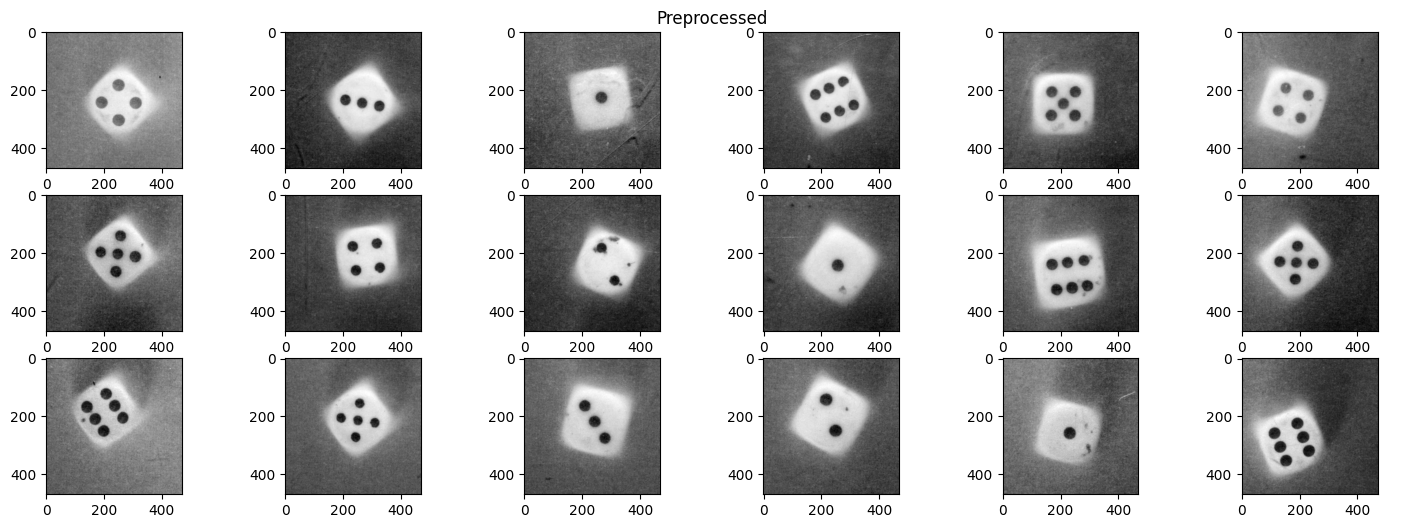

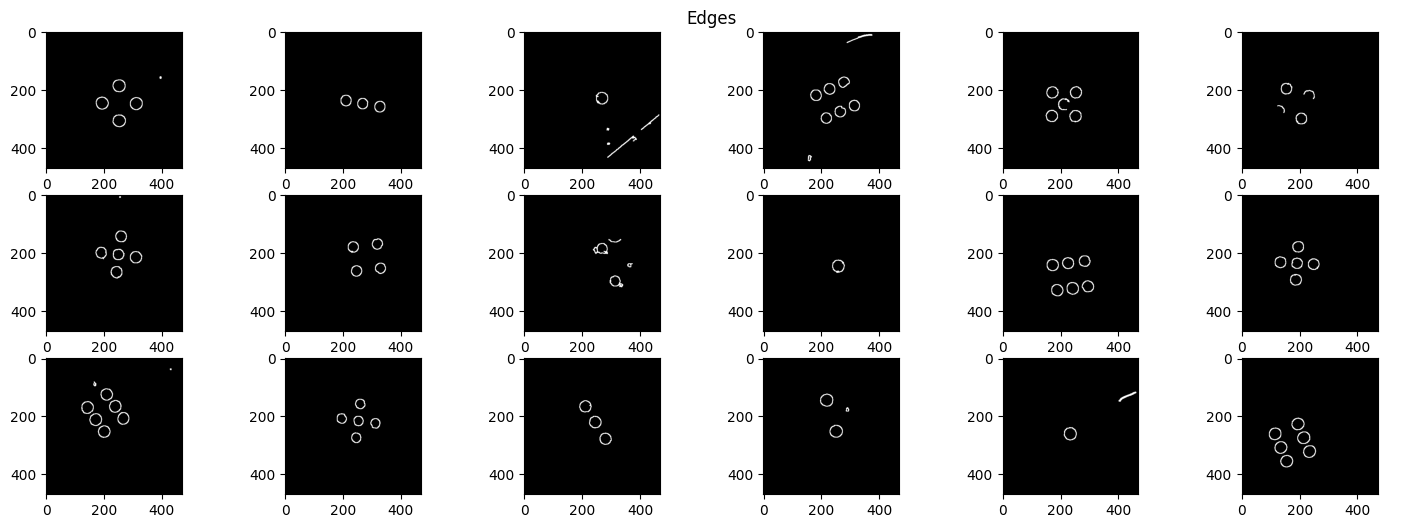

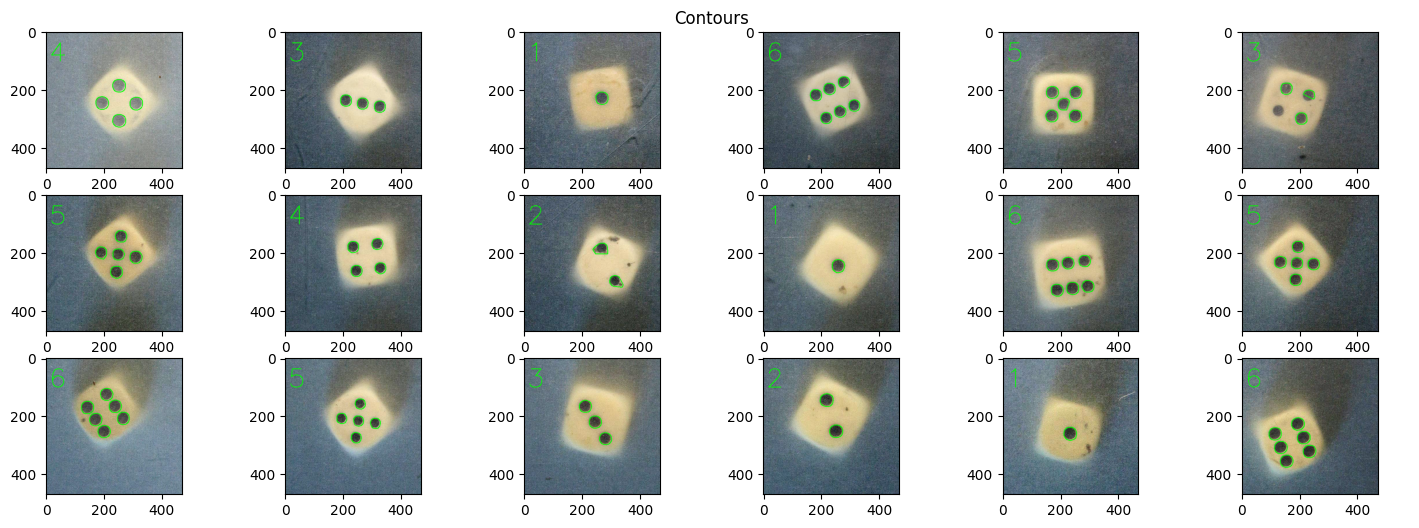

In [46]:
# apply to all images
img_size = len(dice_images[0])**2

blur=5
normalise=False
canny_low=90
canny_high=200
dilate_erode_kernel_size=2
dilate_iterations=3
erode_iterations=1
min_area = 0.36 # percent of image size
max_area = 0.9  # percent of image size

process_display_all(dice_images, rows, cols, blur, normalise, canny_low, canny_high, dilate_erode_kernel_size, dilate_iterations, erode_iterations, min_area, max_area)

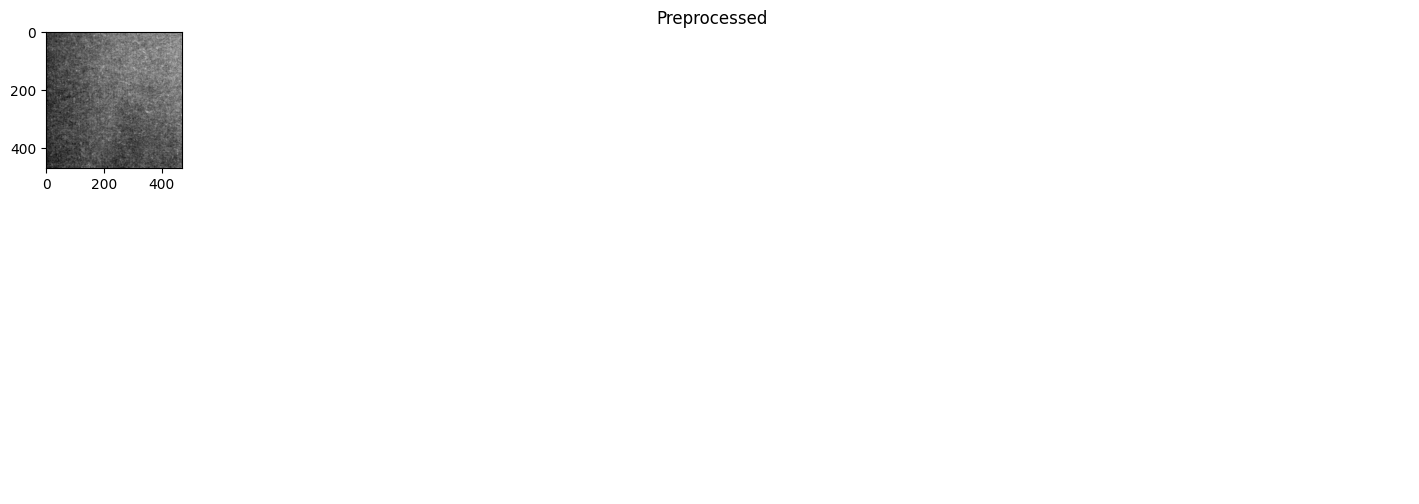

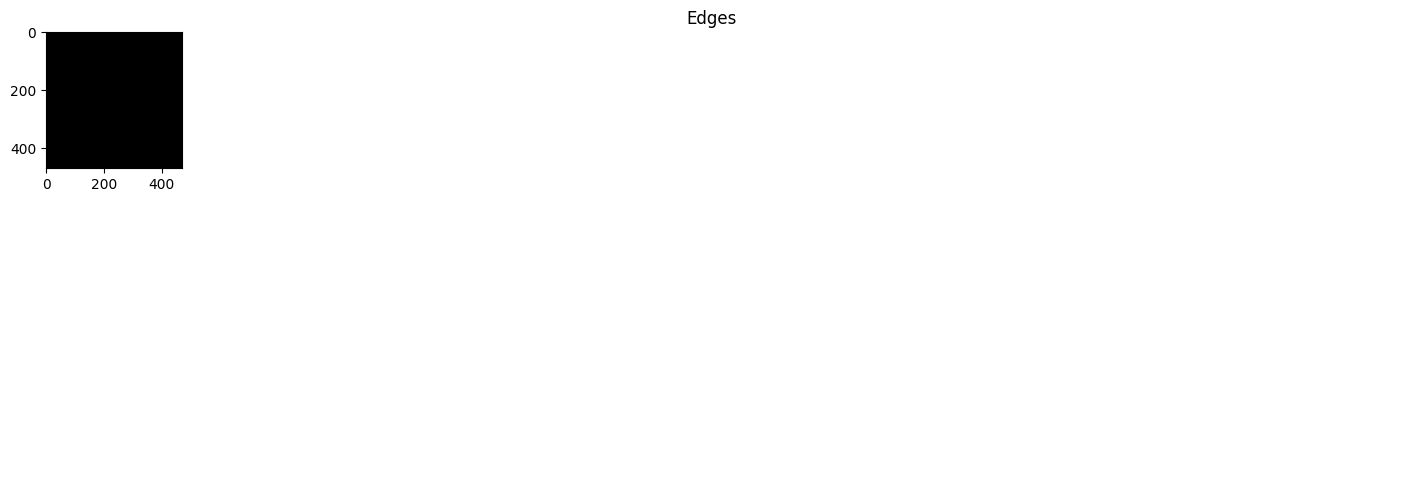

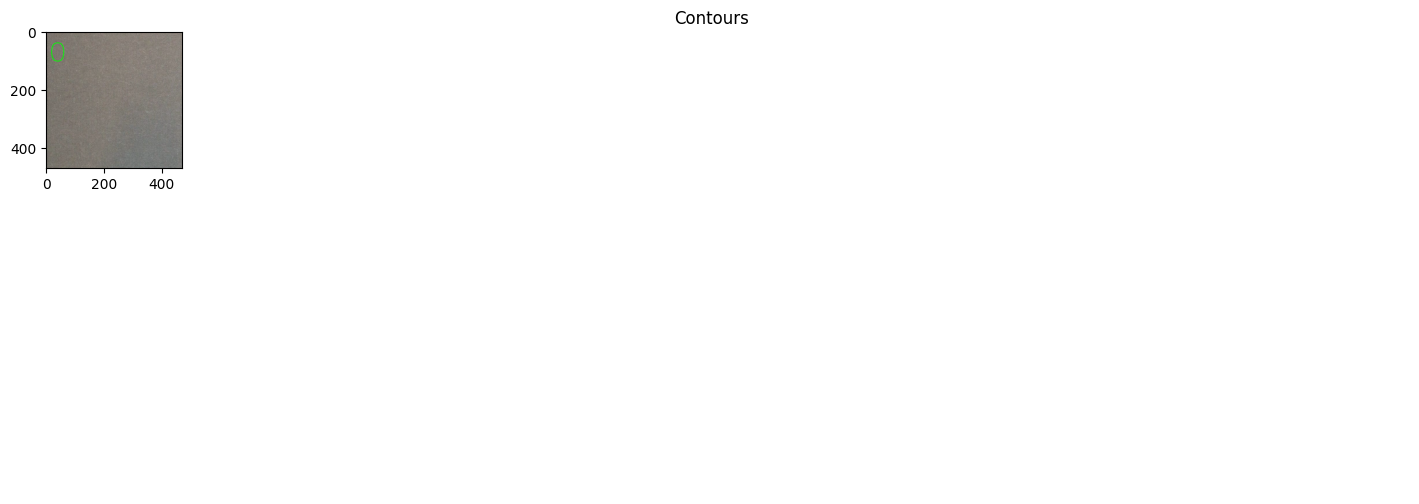

In [47]:
process_display_all([no_dice_image], rows, cols, blur, normalise, canny_low, canny_high, dilate_erode_kernel_size, dilate_iterations, erode_iterations, min_area, max_area)